# 数据预处理

In [1]:
import numpy as np
import pickle
dataSet, dataLabel = pickle.load(open('data.pkl', 'rb'), encoding='latin1')


In [ ]:
def visualization(k, dataSet, dataLabel, cents, labels, sse, lowestsse):   # 画出聚类结果
    # 每一类用一种颜色
    # colors = ['pink', 'blue', 'brown', 'cyan', 'darkgreen', 'darkorange', 'darkred', 'gray', 'navy', 'yellow']
    colors = ['#FFC0CB','#0000FF','#A52A2A','#00FFFF','#006400','#FF8C00','#8B0000','#808080','#000080','#FFFF00']
    # colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y', '#e24fff', '#524C90', '#845868']
    for i in range(k):
        index = np.nonzero(labels == i)[0]
        x0 = dataSet[index, 0]
        x1 = dataSet[index, 1]
        y_i = dataLabel[index]
        for j in range(len(x0)):
            plt.text(x0[j], x1[j], str(int(y_i[j])), color=colors[i], fontdict={'weight': 'bold', 'size': 9})
        plt.scatter(cents[i, 0], cents[i, 1], marker='x', color=colors[i], linewidths=12)

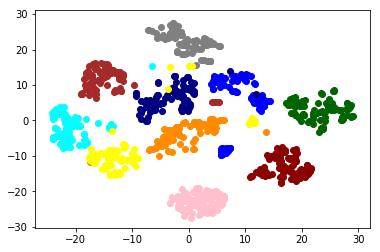

In [72]:
colors = ['#FFC0CB','#0000FF','#A52A2A','#00FFFF','#006400','#FF8C00','#8B0000','#808080','#000080','#FFFF00']
k=10
for i in range(k):
    # plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='r', marker='+')
    plt.scatter(dataSet[dataLabel==i, 0], dataSet[dataLabel==i, 1], color=colors[i])

In [ ]:
#数据归一化

In [2]:
def autoNorm(dataSet):
    #获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals

In [3]:
normDataSet, ranges, minVals = autoNorm(dataSet)

# KNN分类

In [46]:
import time
class kMeans(object):
    def __init__(self, n_clusters=10, initCent='random', max_iter=100):
        if hasattr(initCent, '__array__'):#预先设置初始聚类中心
            n_clusters = initCent.shape[0]
            self.centroids = np.asarray(initCent, dtype=np.float)
        else:
            self.centroids = None
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.initCent = initCent
        self.clusterAssment = None
        self.labels = None
        self.sse = None
    # 计算两个向量的欧式距离
    def distEclud(self, vecA, vecB):
        return np.linalg.norm(vecA - vecB)

    # 计算两点的曼哈顿距离
    def distManh(self, vecA, vecB):
        return np.linalg.norm(vecA - vecB, ord=1)

    # 随机化初始聚类中心
    def randCent(self, X, k):
        n = X.shape[1]  # 特征维数
        centroids = np.empty((k, n))  # k*n的矩阵，用于存储每簇的质心
        for j in range(n):  # 产生质心，一维一维地随机初始化
            minJ = min(X[:, j])
            rangeJ = float(max(X[:, j]) - minJ)
            centroids[:, j] = (minJ + rangeJ * np.random.rand(k, 1)).flatten()
        return centroids

    def fit(self, X):
        if not isinstance(X, np.ndarray):
            try:
                X = np.asarray(X)
            except:
                raise TypeError("numpy.ndarray required for X")
        m = X.shape[0]  # 样本数量
        self.clusterAssment = np.empty((m, 2))  # m*2的矩阵，第一列表示样本属于哪一簇，第二列存储该样本与质心的平方误差(Squared Error,SE)
        if self.initCent == 'random':   # 可以指定质心或者随机产生质心
            self.centroids = self.randCent(X, self.n_clusters)
        clusterChanged = True
        for s in range(self.max_iter):# 指定最大迭代次数
            clusterChanged = False
            for i in range(m):  # 将每个样本分配到离它最近的质心所属的簇
                minDist = np.inf
                minIndex = -1
                for j in range(self.n_clusters):    #遍历所有数据点找到距离每个点最近的质心
                    distJI = self.distEclud(self.centroids[j, :], X[i, :])
                    if distJI < minDist:
                        minDist = distJI
                        minIndex = j
                if self.clusterAssment[i, 0] != minIndex:
                    clusterChanged = True
                    self.clusterAssment[i, :] = minIndex, minDist ** 2
            if not clusterChanged:  # 若所有样本点所属的簇都不改变,则已收敛，提前结束迭代
                print("迭代次数：",s)
                break
            for i in range(self.n_clusters):  # 将每个簇中的点的均值作为质心
                ptsInClust = X[np.nonzero(self.clusterAssment[:, 0] == i)[0]]  # 取出属于第i个族的所有点
                if(len(ptsInClust) != 0):
                    self.centroids[i, :] = np.mean(ptsInClust, axis=0)

        self.labels = self.clusterAssment[:, 0]
        self.sse = sum(self.clusterAssment[:, 1])   # Sum of Squared Error,SSE

# 结果分析

In [83]:
start=time.time()
K = 10#设置聚类个数
clf = kMeans(k)
clf.fit(normDataSet)
cents = clf.centroids
labels = clf.labels
sse = clf.sse
end=time.time()
print("用时：",end-start)

迭代次数： 17
用时： 1.2463581562042236


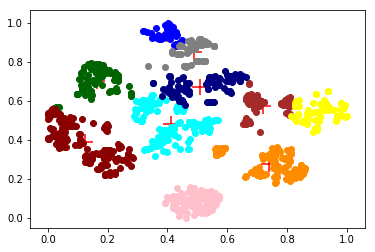

In [95]:
colors = ['#FFC0CB','#0000FF','#A52A2A','#00FFFF','#006400','#FF8C00','#8B0000','#808080','#000080','#FFFF00']
k=10
for i in range(k):
    plt.scatter(cents[i, 0], cents[i, 1], s=250, c='r', marker='+')
    plt.scatter(normDataSet[labels==i, 0], normDataSet[labels ==i, 1], color=colors[i])

# 手肘法确定k值

In [108]:
max_K = 20
K_range = np.arange(1, max_K, dtype=int)
wks = np.zeros(len(K_range))
for i, K in enumerate(K_range):
    clf = kMeans(K)
    clf.fit(normDataSet)
    wks[i] =clf.sse
print(wks)

迭代次数： 1
迭代次数： 15
迭代次数： 5
迭代次数： 6
迭代次数： 8
迭代次数： 9
迭代次数： 28
迭代次数： 16
迭代次数： 18
迭代次数： 19
迭代次数： 24
迭代次数： 10
迭代次数： 7
迭代次数： 29
迭代次数： 9
迭代次数： 14
迭代次数： 15
迭代次数： 9
迭代次数： 15
[370.29718183 245.92469761 134.53558847  67.99797274  53.54284456
  29.49332203  34.31068821  29.4046253   58.69838352  22.91704352
  36.35848569  25.12287751  24.88229826  31.37119554  27.57954763
  16.80420706  18.18386392  16.64355099  12.63225336]


Text(0, 0.5, 'Dk')

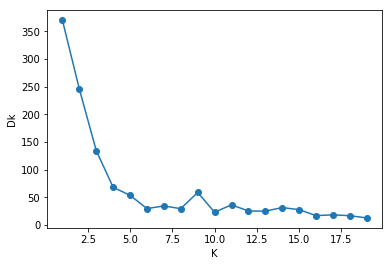

In [110]:
plt.plot(K_range, wks, 'o-')
plt.xlabel('K')
plt.ylabel('Dk')

# Gap Statistic

In [111]:
def bounding_box(data):
    dim = data.shape[1]
    boxes = []
    for i in range(dim):
        data_min = np.amin(data[:, i])
        data_max = np.amax(data[:, i])
        boxes.append((data_min, data_max))
    return boxes
def gap_statistic(data, max_K, B, cluster_algorithm):
    num_points, dim = data.shape
    K_range = np.arange(1, max_K, dtype=int)
    num_K = len(K_range)
    boxes = bounding_box(data)
    data_generate = np.zeros((num_points, dim))

    log_Wks = np.zeros(num_K)
    for indK, K in enumerate(K_range):
        clf = cluster_algorithm(K)
        clf.fit(data)
#         cents = clf.centroids
#         labels = clf.labels
        log_Wks[indK] = np.log(clf.sse)
#         cluster_centers, labels, _ = cluster_algorithm(data, K)
#         log_Wks[indK] = np.log(calculate_Wk(data, cluster_centers, labels))
    gaps = np.zeros(num_K)
    sks = np.zeros(num_K)
    log_Wkbs = np.zeros((B, num_K))

    # generate B reference data sets
    for b in range(B):
        for i in range(num_points):
            for j in range(dim):
                data_generate[i, j] = \
                    np.random.uniform(boxes[j][0], boxes[j][1])
        for indK, K in enumerate(K_range):
            clf = cluster_algorithm(K)
            clf.fit(data)
#         cents = clf.centroids
#         labels = clf.labels
            log_Wkbs[b,indK] = np.log(clf.sse)
    for k in range(num_K):
        gaps[k] = np.mean(log_Wkbs[:, k]) - log_Wks[k]
        sks[k] = np.std(log_Wkbs[:, k]) * np.sqrt(1 + 1.0 / B)
    return gaps, sks, log_Wks


In [ ]:
max_K = 20
B = 20
K_range = np.arange(1, max_K, dtype=int)
gaps, stds, log_wks = gap_statistic(normDataSet, max_K, B,kMeans)

Select K: 9


Text(0, 0.5, 'Gap')

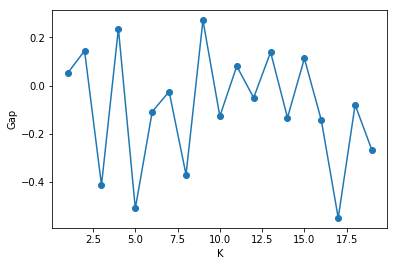

In [117]:
select_K = K_range[np.argmax(gaps)]
print('Select K: {}'.format(select_K))

plt.plot(K_range, gaps, 'o-')
plt.xlabel('K')
plt.ylabel('Gap')

# 遗传算法进行初始化

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

In [39]:
def fresh_property(population_current):
    sum = 0
    for i in range(Population_size):
      #  print(i)
        population_current[i][1]['fitness'] = objective_function(population_current[i])#计算适应度
        sum += population_current[i][1]['fitness']
    population_current[0][1]['rate_fit'] = population_current[0][1]['fitness'] / sum #
    population_current[0][1]['cumm_fit'] = population_current[0][1]['rate_fit']
    for i in range(Population_size):
        population_current[i][1]['rate_fit'] = population_current[i][1]['fitness'] / sum
        population_current[i][1]['cumm_fit'] = population_current[i][1]['rate_fit'] + population_current[i-1][1]['cumm_fit']  
    print('finish_fresh')
def objective_function(individual):
    distance = 0
    for index in normDataSet:
        distance += np.array((np.subtract(individual[0],index)**2)).sum(axis=1).min()#求出所有样本点到种群个体的距离极小值
    return distance



def select(population_current,population_next):
    for i in range(Population_size):
      #  print('select',i)
        rand = np.random.rand(1)
        if rand <= population_current[0][1]['cumm_fit']:
            population_next[i] = population_current[0]
        else:
            for j in range(Population_size):
                if population_current[j][1]['cumm_fit'] <= rand and population_current[j+1][1]['cumm_fit'] >= rand:
                    population_next[i] = population_current[j+1]
                    break
def crossover(population_next):
    for i in range(Population_size):
       # print('crossover',i)
        rand = np.random.rand(1)
        if rand <= Probability_crossover:
            rand_cluster = np.random.randint(Cluster_number)
            p1_num = np.random.randint(Population_size)
            p2_num = np.random.randint(Population_size)
            p1 = population_next[p1_num]
            p2 = population_next[p2_num]
            c1 = p1
            c2 = p2
            c1[0] = np.vstack([p1[0][:rand_cluster,:],p2[0][rand_cluster:,:]])
            c2[0] = np.vstack([p2[0][:rand_cluster,:],p1[0][rand_cluster:,:]]) 
            test_c = [[],[]]            
            test_c[0].extend([objective_function(c1),objective_function(c2),objective_function(p1),objective_function(p2)])      
            test_c[1].extend([c1,c2,p1,p2])
            population_next[p1_num] = test_c[1][test_c[0].index(min(test_c[0]))]
            test_c[1] = test_c[1][:test_c[0].index(min(test_c[0]))] + test_c[1][test_c[0].index(min(test_c[0]))+1:]
            test_c[0].remove(min(test_c[0]))   
            population_next[p2_num] = test_c[1][test_c[0].index(min(test_c[0]))]
def mutation(population_next):
    for i in range(Population_size):
       # print('mutation')
        rand = np.random.rand(1)
        if rand <= Probability_mutation:
            mutation_array = np.ones([Cluster_number,Dimension_number])
            for k in range(Cluster_number):
                rand_pick = np.random.randint(Population_size)
                mutation_array[k] = population_next[rand_pick][0][k]
            if objective_function([mutation_array]) < objective_function(population_next[i]):
                population_next[i][0] = mutation_array

In [40]:
Population_size = 40
Dimension_number = 2
Cluster_number=10
cluster_num=10
#初始化个体
population_current = []
population_next = []
for i in range(Population_size):
    gene_array = np.array([])
    for j in range(Dimension_number):
        gene = np.random.uniform(0,1,(Cluster_number,1))
        if len(gene_array) == 0:
            gene_array = gene
        else:
            gene_array = np.hstack([gene_array,gene])
    population_current.append([gene_array,{'rate_fit':0,'cumm_fit':0,'fitness':0}])
population_next = population_current[:]    
fresh_property(population_current)

finish_fresh


In [ ]:
iteration_num = 100
Probability_crossover = 0.5
Probability_mutation = 0.0001
for i in range(iteration_num):
    print('iteration',i)
    select(population_current,population_next)
    crossover(population_next)
    mutation(population_next)
    fresh_property(population_next)
    population_current = population_next[:]

In [51]:
k=10
start=time.time()
clf = kMeans(k,initCent=population_next[0][0])
clf.fit(normDataSet)
cents = clf.centroids
labels = clf.labels
sse = clf.sse
end=time.time()
print("用时：",end-start)

D:\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


迭代次数： 15
用时： 1.0911171436309814


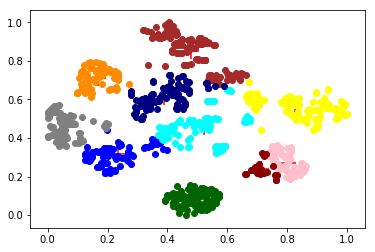

In [54]:
from matplotlib import pyplot as plt
colors = ['#FFC0CB','#0000FF','#A52A2A','#00FFFF','#006400','#FF8C00','#8B0000','#808080','#000080','#FFFF00']
k=10
for i in range(k):
    plt.scatter(cents[i, 0], cents[i, 1], s=250, c='r', marker='+')
    plt.scatter(normDataSet[labels==i, 0], normDataSet[labels ==i, 1], color=colors[i])
plt.show()